# This notebook explore using forward Euler to integrate a damped spring-mass ODE system
We use a matrix reppresentation of the second order differential equation

a damped spring-mass ODE system can be written in the following way.
$$ \frac{d^{2}x}{dt^{2}} + 2 \omega d \frac{dx}{dt} +  \omega^{2}x = 0 $$

We can introduce another variable and solve the system of first order differential equations
$$ 
\frac{dx}{dt} = v 
$$

$$
\frac{dv}{dt} = - \omega^{2}x - 2 \omega d v
$$
This is matrix for can be written:
$$
\frac{d}{dt} 
\begin{bmatrix}  x \\ v \\ \end{bmatrix} 
=  
\begin{bmatrix}  0 & 1 \\ -\omega^2 & - 2 d \omega \\ \end{bmatrix}
\begin{bmatrix}  x \\ v \\ \end{bmatrix} 
$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
w = 2 * np.pi   
d = .05   # damping ratio

In [3]:
A = np.array([[0,1],[-w**2, -2*d*w]])
dt = 0.1
T = 10
n = int(T/dt)
t = np.linspace(0,T,n)

In [4]:
# set the initial condition 
x0 = [2,0]

In [5]:
# forword Euler applyed to a matrix 2x2 
# np.eye(2) is the identical 
xF = np.zeros((2,n))
xF[:,0] = x0
for k in range(n-1):
    xF[:,k+1] = (np.eye(2) + dt * A) @ xF[:,k]

In [6]:
# compute better integral using build-in python code
def linear_ode(t,x):
    return A @ x # @ symbol for matrix-vector product

linear_ode_solution = solve_ivp(linear_ode, (0,T), x0, t_eval=t)
xGood = linear_ode_solution.y

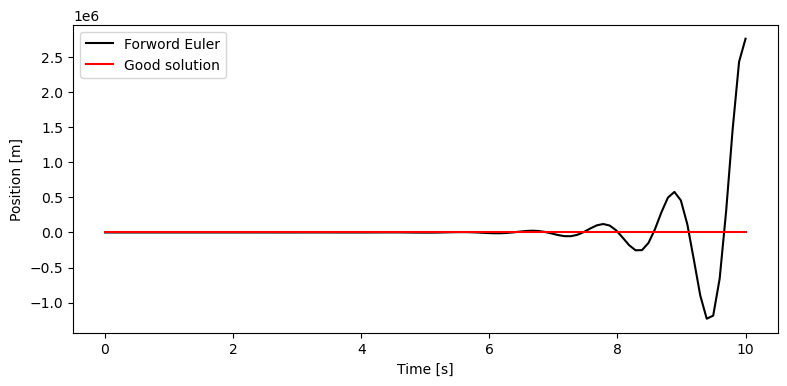

In [7]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
plt.plot(t,xF[0,:],'k',label='Forword Euler')
plt.plot(t,xGood[0,:],'r',label='Good solution')
plt.xlabel('Time [s]')
plt.ylabel('Position [m]')
plt.legend()